# IMPORTING MODULES

In [25]:
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline


# CLEANING DATA

In [26]:
'''Reading the data from csv files'''
data = pd.read_csv('appstore_games.csv')
display(data.head(3))
print('Dimension of data:', data.shape)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017


Dimension of data: (17007, 18)


In [27]:
data.drop(['URL', 'ID'], axis = 1, inplace = True)
df.shape

In [32]:
data=data.drop_duplicates()
data=data.drop(['Subtitle','Languages'],axis=1)
data1 = data.dropna(subset=['User Rating Count'])
data1.isnull().sum()

Name                               0
Icon URL                           0
Average User Rating                0
User Rating Count                  0
Price                              0
In-app Purchases                2899
Description                        0
Developer                          0
Age Rating                         0
Size                               0
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
dtype: int64

In [30]:
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    return summary

# DISPLAYING CLEANED DATA 

In [33]:
description(data)

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,Name,object,0,16847,Sudoku,Reversi,Morocco
1,Icon URL,object,0,16847,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...
2,Average User Rating,float64,9359,9,4,3.5,3
3,User Rating Count,float64,9359,1792,3553,284,8376
4,Price,float64,24,24,2.99,1.99,0
5,In-app Purchases,object,9232,3803,NaN,NaN,NaN
6,Description,object,0,16473,"Join over 21,000,000 of our fans and download ...","The classic game of Reversi, also known as Oth...",Play the classic strategy game Othello (also k...
7,Developer,object,0,8693,Mighty Mighty Good Games,Kiss The Machine,Bayou Games
8,Age Rating,object,0,4,4+,4+,4+
9,Size,float64,1,15794,1.58536e+07,1.2329e+07,674816


# To expose the best combination for strategy games available in the appstore in order to get a good user rating (4.0/5.0 and above) 

In [64]:
dat = data.groupby(['Genres']).median()
print (dat['Average User Rating'])


Genres
Books, Games, Board, Strategy               4.00
Books, Games, Role Playing, Strategy        4.50
Books, Games, Strategy, Word                4.50
Books, Role Playing, Games, Strategy        4.00
Books, Role Playing, Strategy, Games         NaN
Books, Strategy, Games, Word                4.50
Books, Strategy, Word, Games                 NaN
Business, Family, Strategy, Games            NaN
Business, Games, Puzzle, Strategy            NaN
Business, Games, Simulation, Strategy        NaN
Business, Games, Strategy                   4.00
Business, Games, Strategy, Music             NaN
Business, Games, Word, Strategy              NaN
Business, Role Playing, Games, Strategy      NaN
Business, Strategy, Action, Games            NaN
Business, Strategy, Games                   2.00
Business, Strategy, Games, Simulation        NaN
Business, Strategy, Simulation, Games        NaN
Education, Action, Strategy, Games           NaN
Education, Board, Games, Strategy           3.75
Education, Bo

# this shows the strategies which can be used for good user rating as the mdeian value will show the maximum number of ratings of 4 or 4+

# SIMPLE ANALYSIS

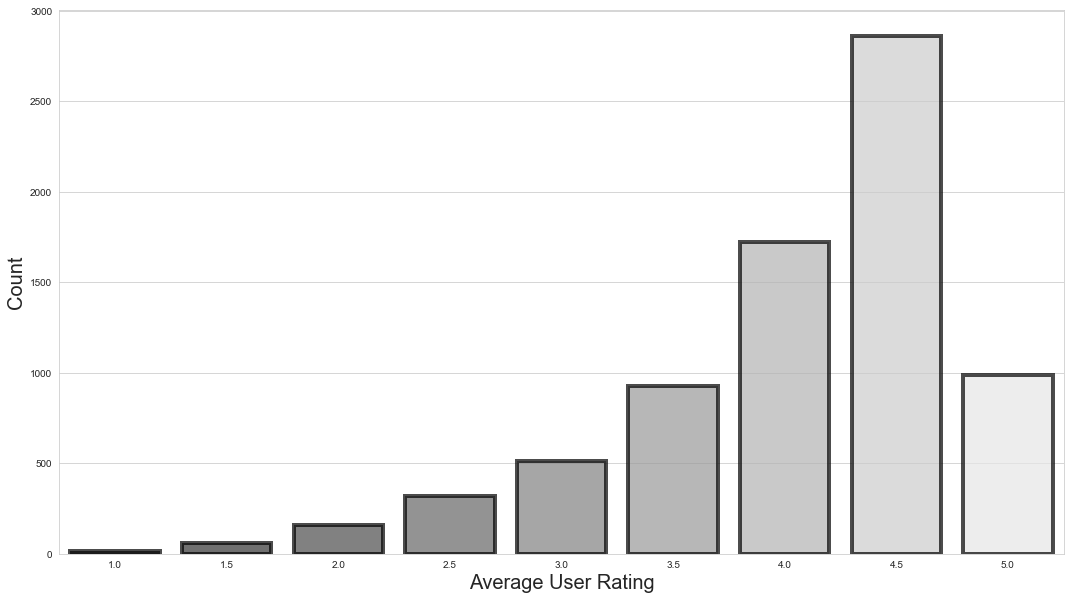

In [6]:
plt.rcParams['figure.figsize'] = (18, 10)
ax = sns.countplot(data = data, x ='Average User Rating', palette = 'gray', alpha = 0.7, linewidth=4, edgecolor= 'black')
ax.set_ylabel('Count', fontsize = 20)
ax.set_xlabel('Average User Rating', fontsize = 20)
plt.show()

# INFERENCE : most users have rated - 4.5 stars

C:\Users\SKS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\SKS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


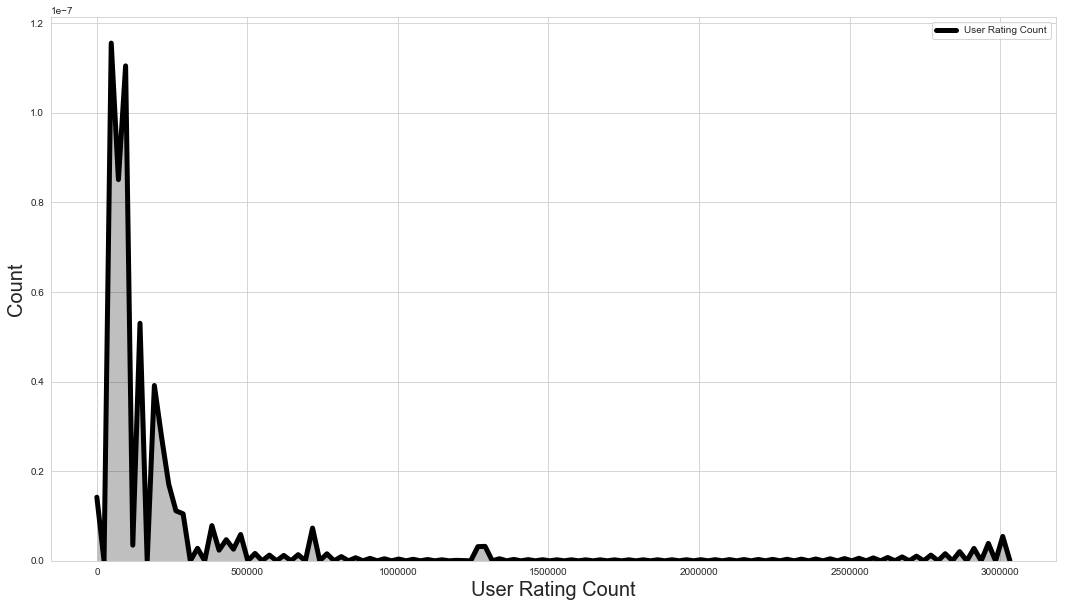

In [24]:
plt.rcParams['figure.figsize'] = (18, 10)
ax = sns.kdeplot(data['User Rating Count'], shade = True, linewidth = 5, color = 'k')
ax.set_ylabel('Count', fontsize = 20)
ax.set_xlabel('User Rating Count', fontsize = 20)
plt.show()

# INFERENCE - very less people have voted between 0 and 1 and highest rating between 0 and 500000 and the count is nearer to 1.2 

# Identify the genres which are more significant and do simple analysis for the distribution according to genres.

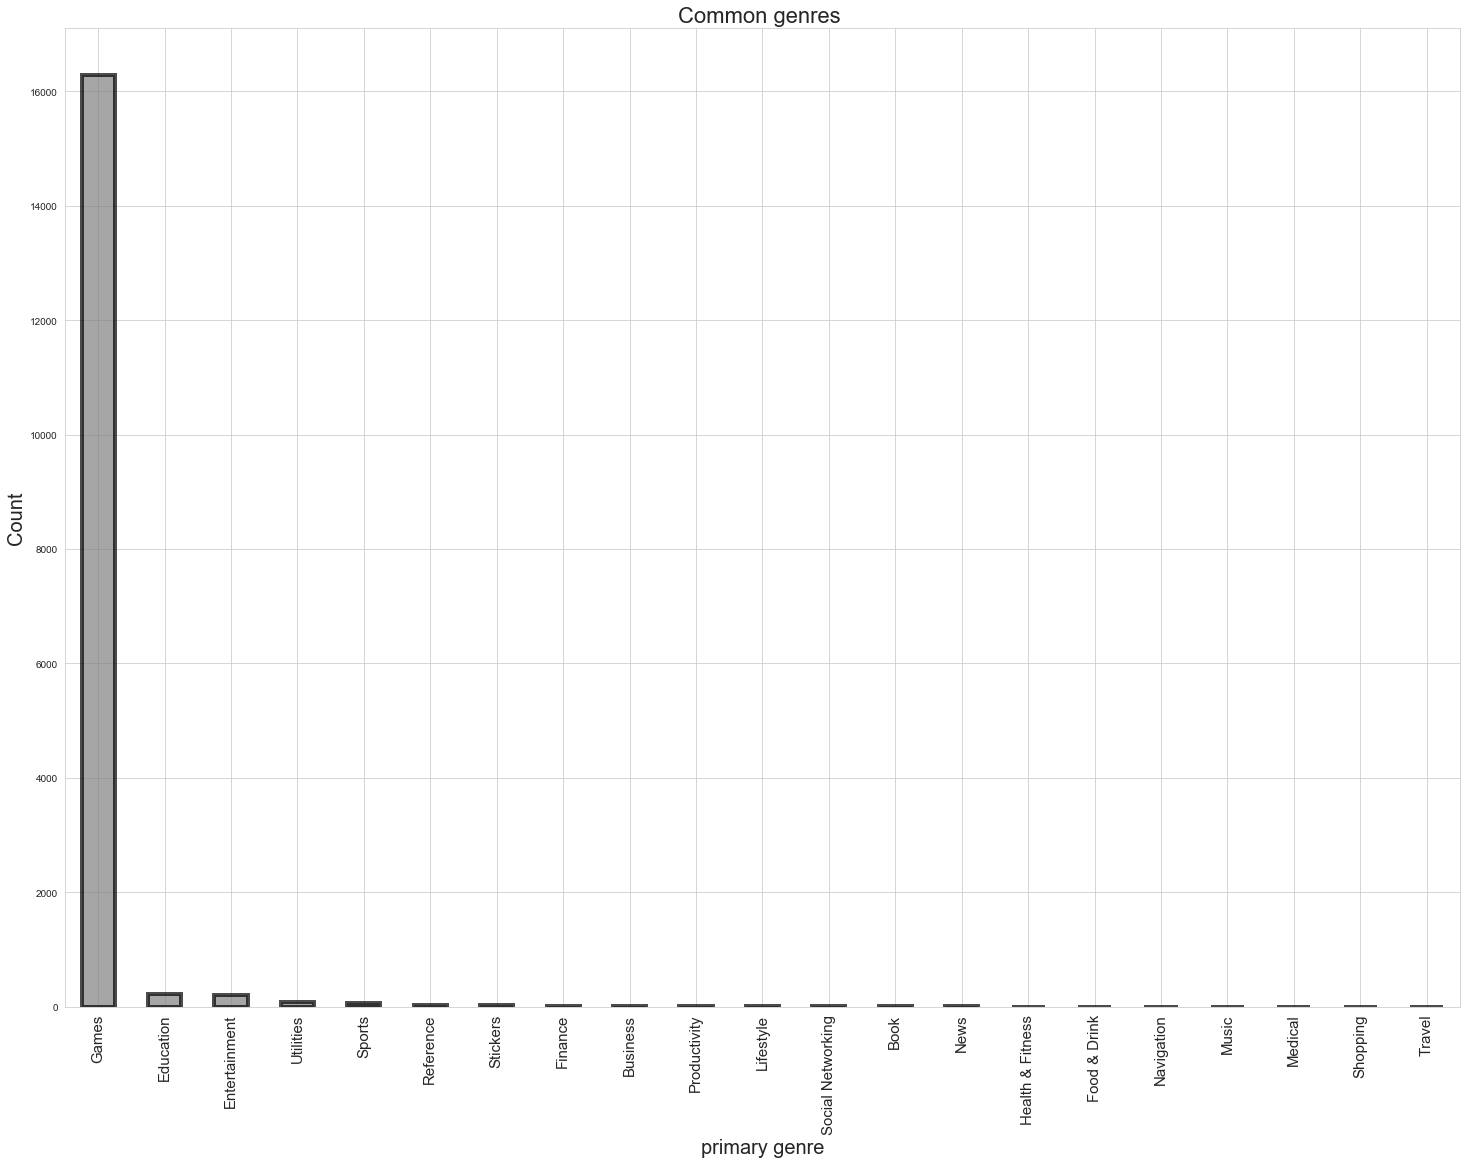

In [23]:
plt.rcParams['figure.figsize'] = (25, 18)
data['Primary Genre'].value_counts().plot(kind='bar',color = 'gray', alpha = 0.7, linewidth=4, edgecolor= 'black')
plt.xlabel("primary genre", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Common genres ", fontsize=22)
plt.xticks(rotation=90, fontsize = 15) 
plt.show()

# INFERENCE - most prominent genre is "Games" with its highest count and shows it is highly significant among other genres.

# Identify Which genres have higher user ratings. 

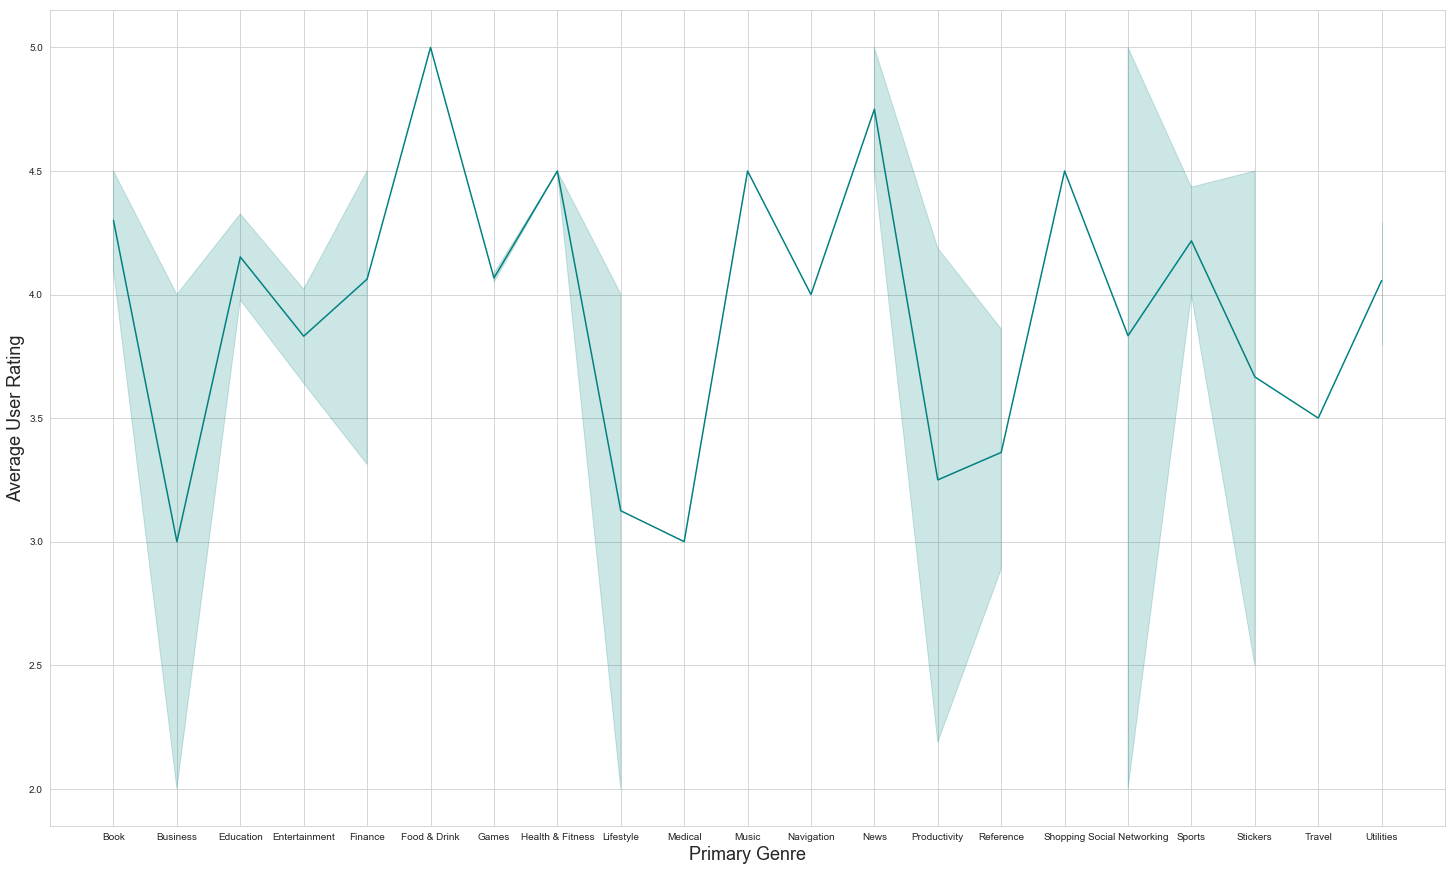

In [34]:
from matplotlib.ticker import NullFormatter
plt.rcParams['figure.figsize'] = (25,15)
ax = sns.lineplot(data = data, x='Primary Genre', y='Average User Rating', color = 'teal')
plt.xlabel('Primary Genre', fontsize = 18)
plt.ylabel('Average User Rating', fontsize = 18)
plt.show()

# INFERENCE - this shows that food and drink has highest rating and least for business and medical according to the users.Rest genres are in proximity of mid range specifying their equal usage and rating depending upon the varieties and nature and mutiple applications

# Identify trend of user rating based on pricing.

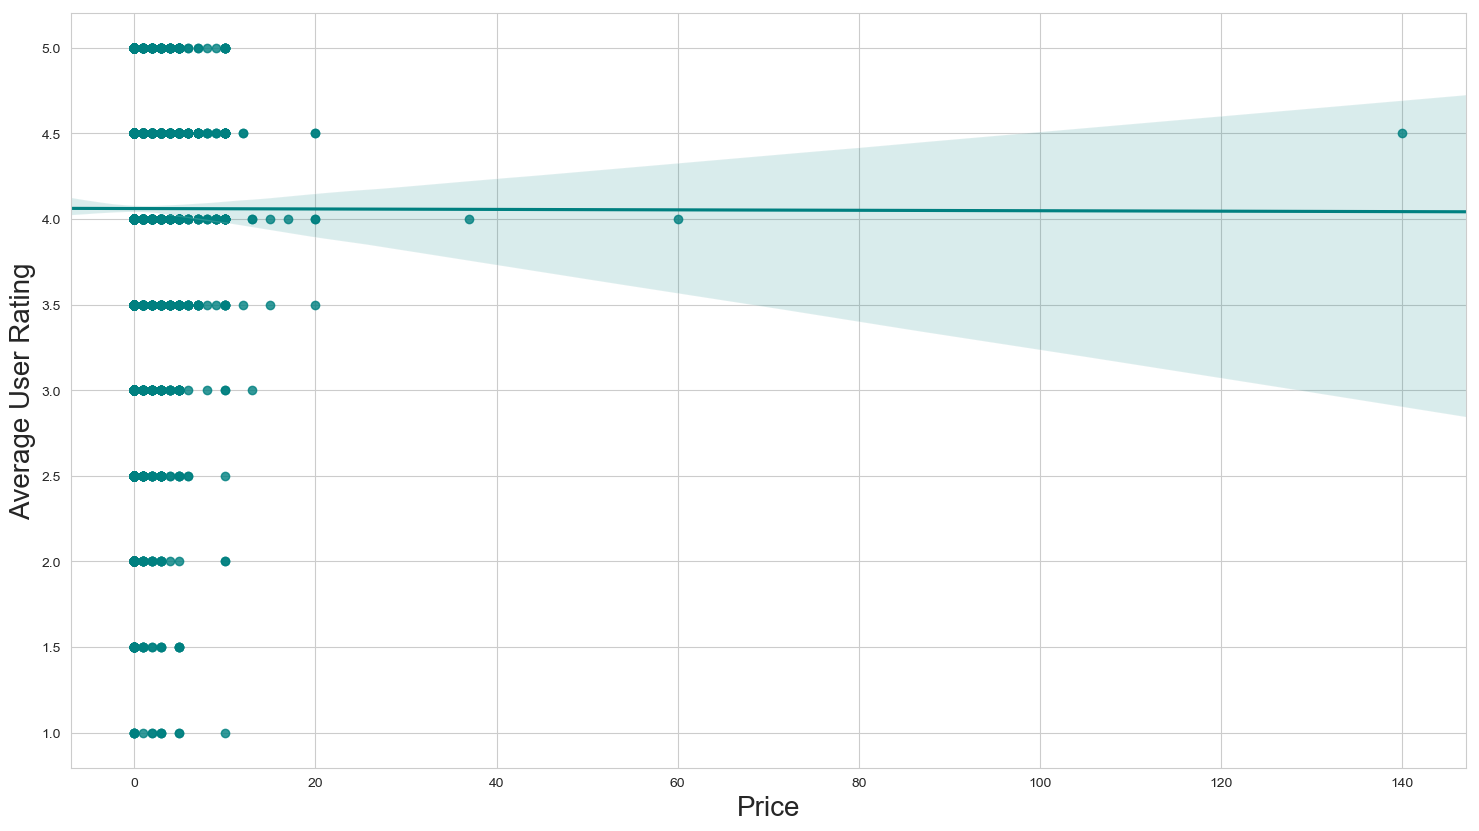

In [18]:
plt.figure(figsize=(18,10), dpi= 100)
ax = sns.regplot(data=data, x='Price', y='Average User Rating', color = 'teal')
ax.set_ylabel('Average User Rating', fontsize = 20)
ax.set_xlabel('Price', fontsize = 20)
plt.show()

# INFERENCE - this shows the amount of users rated for free games and less for paid games. It also signifies that users mostly prefer free games over paid games.Maximum people have rated for free games.